In [1]:
from game_utils import GameNode, random_play, minmax_decision, alpha_beta_search, maxplayer, minplayer, randplayer, game_play, mcts, dot_graph, DictGameNode
from operator import itemgetter

from IPython.display import Image

import pydot

import numpy as np

In [2]:
moves = {'A': ['B', 'C', 'D'], 'B': ['E', 'F', 'G'], 'C': ['H', 'I'], 'D': ['J', 'K', 'L'], 'K': ['M', 'N']}

terminal_nodes = {'E': -1, 'F': +1, 'G': -1, 'H': +1, 'I': -1, 'J': +1, 'L': +1, 'M': -1, 'N': +1}

In [3]:
DictGameNode._moves = moves
DictGameNode._terminal_nodes = terminal_nodes

In [4]:
initial_gn = DictGameNode(board = 'A', np = 'X')

In [5]:
random_play(initial_gn)

A
It's X's turn.
Chosen move B

B
It's O's turn.
Chosen move G

G
Winner is O.


In [6]:
# Game play

random_state = np.random.RandomState()

x_player = lambda b: maxplayer(b, algo = alpha_beta_search)
#x_player = lambda b: randplayer(b, rs = random_state)
#x_player = lambda b: human_player(b, 'X')

#o_player = lambda b: randplayer(b, rs = random_state)
o_player = lambda b: minplayer(b, algo = alpha_beta_search)

game_play(initial_gn, x_player, o_player)

A
It's X's turn.
X has a winning strategy
Chosen move D.

D
It's O's turn.
X has a winning strategy.
Chosen move J.


Game ended.
J
Winner is X.


In [7]:
root_mcnode = mcts(initial_gn, np.random.RandomState(0), max_iter=1000)
root_mcnode

A
U/N: 38/1000

In [8]:
pydot_graph = dot_graph(root_mcnode)

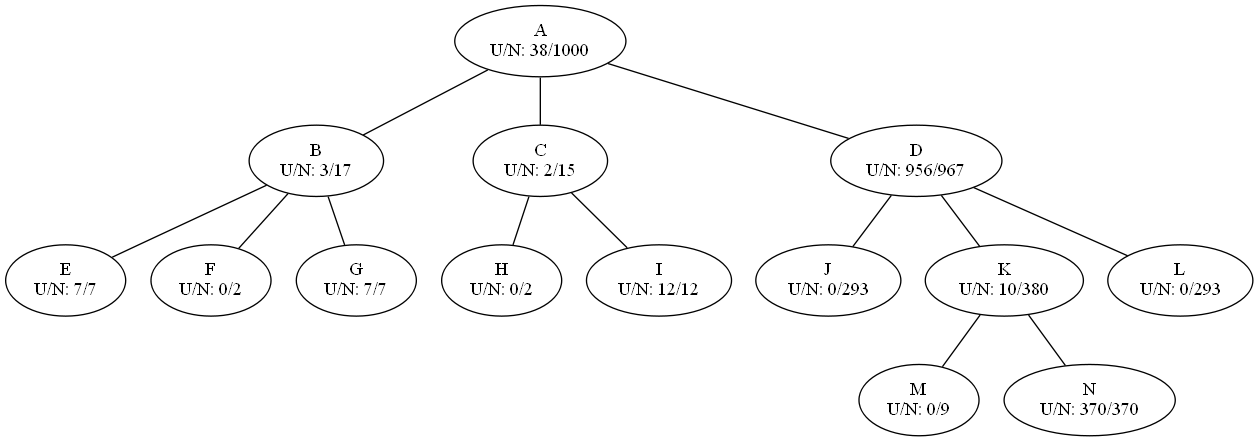

In [9]:
Image(pydot_graph.create_png())